In [1]:
import pandas as pd
import numpy as py
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("londonhouses.csv")

In [3]:
df.head()

,Unnamed: 0,Property Name,Price,House Type,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,Location,City/County,Postal Code
0,0,Queens Road,1675000,House,2716,5,5,5,Wimbledon,London,SW19 8NY
1,1,Seward Street,650000,Flat / Apartment,814,2,2,2,Clerkenwell,London,EC1V 3PA
2,2,Hotham Road,735000,Flat / Apartment,761,2,2,2,Putney,London,SW15 1QL
3,3,Festing Road,1765000,House,1986,4,4,4,Putney,London,SW15 1LP
4,4,Spencer Walk,675000,Flat / Apartment,700,2,2,2,Putney,London,SW15 1PL


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3480 entries, 0 to 3479
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         3480 non-null   int64 
 1   Property Name      3480 non-null   object
 2   Price              3480 non-null   int64 
 3   House Type         3480 non-null   object
 4   Area in sq ft      3480 non-null   int64 
 5   No. of Bedrooms    3480 non-null   int64 
 6   No. of Bathrooms   3480 non-null   int64 
 7   No. of Receptions  3480 non-null   int64 
 8   Location           2518 non-null   object
 9   City/County        3480 non-null   object
 10  Postal Code        3480 non-null   object
dtypes: int64(6), object(5)
memory usage: 299.2+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,3480.0,1.739500e+03,1.004734e+03,0.0,869.75,1739.5,2609.25,3479.0
Price,3480.0,1.864173e+06,2.267283e+06,180000.0,750000.00,1220000.0,2150000.00,39750000.0
Area in sq ft,3480.0,1.712974e+03,1.364259e+03,274.0,834.00,1310.0,2157.25,15405.0
No. of Bedrooms,3480.0,3.103736e+00,1.517698e+00,0.0,2.00,3.0,4.00,10.0
No. of Bathrooms,3480.0,3.103736e+00,1.517698e+00,0.0,2.00,3.0,4.00,10.0
No. of Receptions,3480.0,3.103736e+00,1.517698e+00,0.0,2.00,3.0,4.00,10.0


In [4]:
import pandas as pd

df = pd.read_csv("londonhouses.csv")

# Standardize column names
df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
df.columns = df.columns.str.strip().str.lower().str.replace("/", "_")
df.columns = df.columns.str.replace(".", "", regex=False)

# Drop unwanted index column
if "unnamed:_0" in df.columns:
    df = df.drop(columns=["unnamed:_0"])

# Convert numeric columns
num_cols = [
    "price",
    "area_in_sq_ft",
    "no_of_bedrooms",
    "no_of_bathrooms",
    "no_of_receptions"
]

for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Handle missing values
df = df.dropna(subset=["price", "area_in_sq_ft"])


In [5]:
df.to_csv("londonhouses_clean.csv", index=False, encoding="utf-8-sig")

In [33]:
# Price per square foot
df["price_per_sqft"] = df["price"] / df["area_in_sq_ft"]

# Price band
df["price_band"] = pd.cut(
    df["price"],
    bins=[0,500000,1000000,2000000,5000000,10000000],
    labels=["<500K","500K-1M","1M-2M","2M-5M","5M+"]
)


In [34]:
#Average price by house type

df.groupby("house_type")["price"].mean().sort_values(ascending=False)


house_type
Penthouse           3.112847e+06
House               2.388378e+06
New development     2.186312e+06
Mews                1.400000e+06
Flat / Apartment    1.251813e+06
Duplex              9.342857e+05
Bungalow            9.044444e+05
Studio              3.575000e+05
Name: price, dtype: float64

In [35]:
#Average price by location

df.groupby("location")["price"].mean().sort_values(ascending=False).head(10)


location
Hampstead Heath        23950000.0
30 Montpelier Walk     21000000.0
25 Cork Street         13750000.0
St Johns Wood          12849975.0
Regents Park           12500000.0
Prince Consort Road    10950000.0
100 Knightsbridge       9950000.0
Cheyne Terrace          9950000.0
 St James's             9300000.0
10 Draycott Avenue      8950000.0
Name: price, dtype: float64

In [36]:
#Best value locations (price per sqft)

df.groupby("location")["price_per_sqft"].mean() \
  .sort_values() \
  .head(10)


location
 Coulsdon           331.248816
Watford             333.532457
Coulsdon            370.052879
 Uxbridge           372.982535
 Barwell Lane       390.218522
 Buckhurst Hill     404.157044
 Radlett            410.856574
Kingston            414.458743
 Orpington          416.849495
Walton-On-Thames    438.955318
Name: price_per_sqft, dtype: float64

In [37]:
#Correlation analysis

df[
    ["price", "area_in_sq_ft", "no_of_bedrooms", "no_of_bathrooms"]
].corr()


,price,area_in_sq_ft,no_of_bedrooms,no_of_bathrooms
price,1.000000,0.667710,0.435533,0.435533
area_in_sq_ft,0.667710,1.000000,0.777299,0.777299
no_of_bedrooms,0.435533,0.777299,1.000000,1.000000
no_of_bathrooms,0.435533,0.777299,1.000000,1.000000


C:\Users\Hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


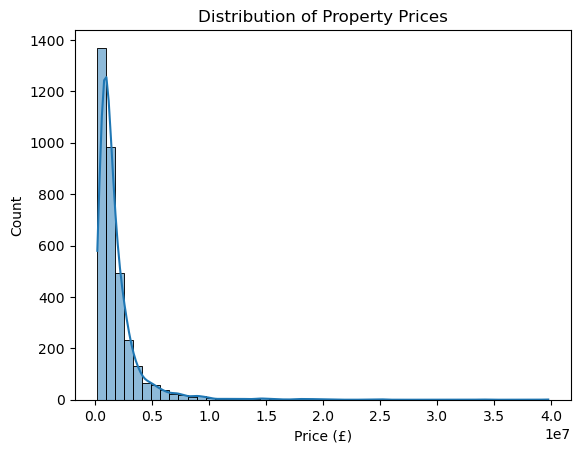

In [38]:
#How are property prices distributed in London?

plt.figure()
sns.histplot(df["price"], bins=50, kde=True)
plt.title("Distribution of Property Prices")
plt.xlabel("Price (£)")
plt.ylabel("Count")
plt.show()


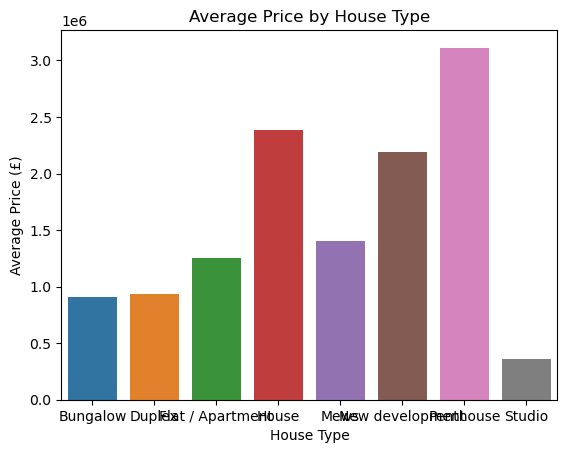

In [45]:
#Do houses cost more than flats?

avg_price_type = df.groupby("house_type")["price"].mean().reset_index()

sns.barplot(data=avg_price_type, x="house_type", y="price")
plt.title("Average Price by House Type")
plt.xlabel("House Type")
plt.ylabel("Average Price (£)")
plt.show()


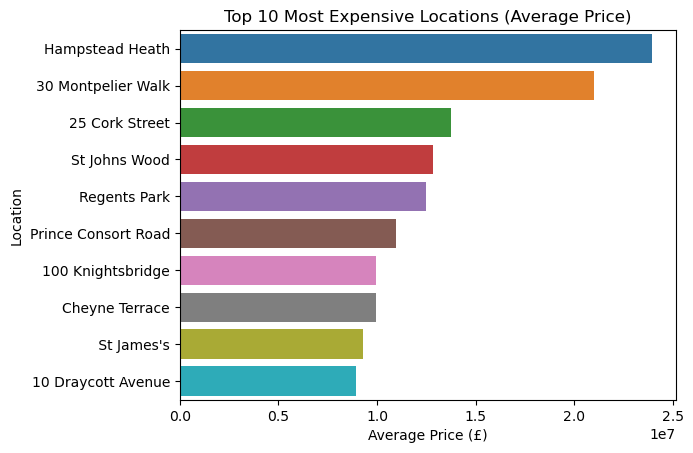

In [40]:
#Which areas are the most expensive on average?

top_locations = (
    df.groupby("location")["price"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

sns.barplot(data=top_locations, y="location", x="price")
plt.title("Top 10 Most Expensive Locations (Average Price)")
plt.xlabel("Average Price (£)")
plt.ylabel("Location")
plt.show()


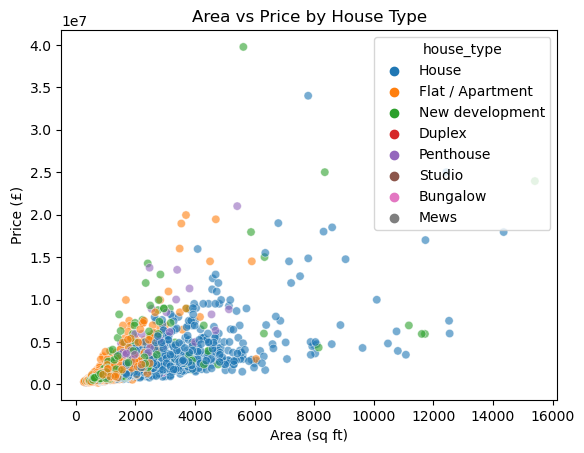

In [41]:
#Does larger area always mean higher price?

sns.scatterplot(
    data=df,
    x="area_in_sq_ft",
    y="price",
    hue="house_type",
    alpha=0.6
)

plt.title("Area vs Price by House Type")
plt.xlabel("Area (sq ft)")
plt.ylabel("Price (£)")
plt.show()


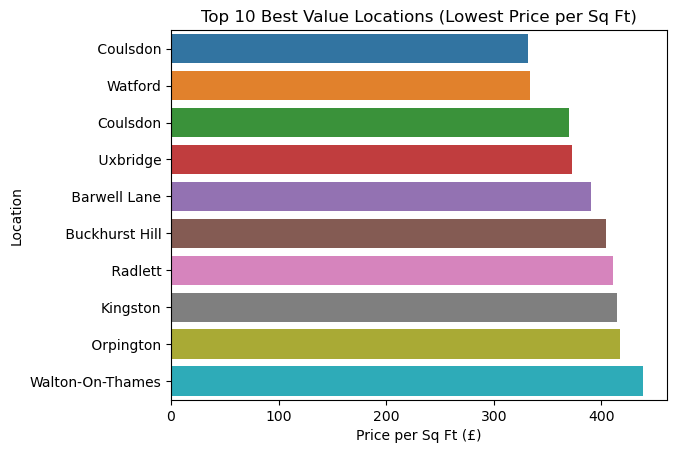

In [42]:
#Which locations offer the best value?

pps_location = (
    df.groupby("location")["price_per_sqft"]
    .mean()
    .sort_values()
    .head(10)
    .reset_index()
)

sns.barplot(data=pps_location, y="location", x="price_per_sqft")
plt.title("Top 10 Best Value Locations (Lowest Price per Sq Ft)")
plt.xlabel("Price per Sq Ft (£)")
plt.ylabel("Location")
plt.show()


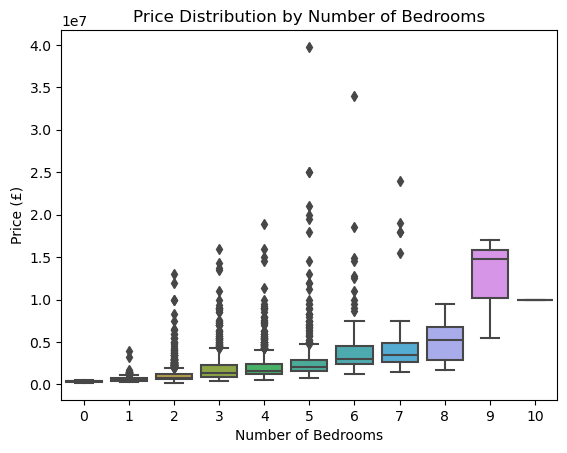

In [43]:
#How does the number of bedrooms affect price?

sns.boxplot(
    data=df,
    x="no_of_bedrooms",
    y="price"
)

plt.title("Price Distribution by Number of Bedrooms")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Price (£)")
plt.show()


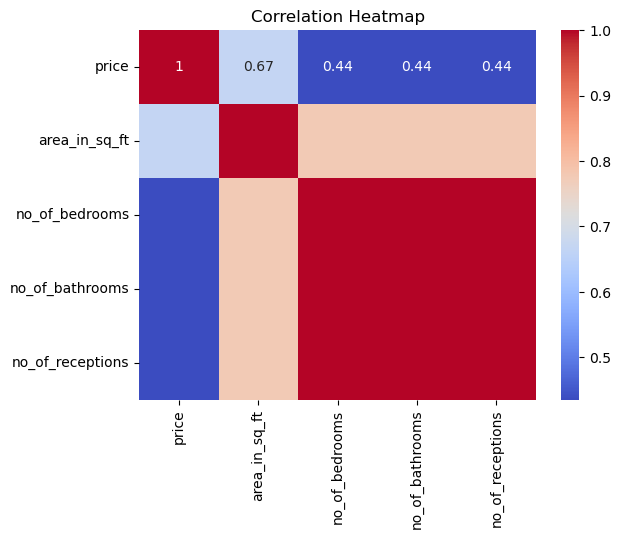

In [44]:
#Which features most influence price?

corr_cols = [
    "price",
    "area_in_sq_ft",
    "no_of_bedrooms",
    "no_of_bathrooms",
    "no_of_receptions"
]

corr = df[corr_cols].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [46]:
pip install pymysql sqlalchemy

Note: you may need to restart the kernel to use updated packages.


In [57]:
from sqlalchemy import create_engine
import pymysql

engine = create_engine(
    "mysql+pymysql://root@localhost:3306/londonhouses?charset=utf8mb4"
)



In [58]:
df.to_sql(
    name="houses",  # name of the table
    con=engine,
    if_exists="replace",    # replace table if it exists; 'append' to add rows
    index=False
)

3480

In [60]:
# Read the 'houses' table
df_check = pd.read_sql("SELECT * FROM houses", con=engine)

# Display the first few rows
print(df_check.head())

   property_name    price        house_type  area_in_sq_ft  no_of_bedrooms  \
0    Queens Road  1675000             House           2716               5   
1  Seward Street   650000  Flat / Apartment            814               2   
2    Hotham Road   735000  Flat / Apartment            761               2   
3   Festing Road  1765000             House           1986               4   
4   Spencer Walk   675000  Flat / Apartment            700               2   

   no_of_bathrooms  no_of_receptions     location city_county postal_code  \
0                5                 5    Wimbledon      London    SW19 8NY   
1                2                 2  Clerkenwell      London    EC1V 3PA   
2                2                 2       Putney      London    SW15 1QL   
3                4                 4       Putney      London    SW15 1LP   
4                2                 2       Putney      London    SW15 1PL   

   price_per_sqft price_band  
0      616.715758      1M-2M  
1     